In [1]:
import os,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import  word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [4]:
frontal_goruntulerin_raporlarinin_dosya_yolu = './dataset/frontal_reports/metadata_frontal.csv'

In [5]:
metadata_frontal_df = pd.read_csv(frontal_goruntulerin_raporlarinin_dosya_yolu)

In [6]:
metadata_frontal_df.tail()

,Id,Findings
3722,996_IM-2479-1001.png,No Findings
3723,997_IM-2479-1001.png,Calcified mediastinal XXXX. No focal areas of ...
3724,998_IM-2479-1001.png,Cardiomediastinal silhouette demonstrates norm...
3725,999_IM-2480-1001.png,Lungs are clear bilaterally. There is no focal...
3726,999_IM-2480-3001.png,Lungs are clear bilaterally. There is no focal...


In [7]:
def showCounts(df):
    counts = df.count()
    plt.figure(figsize=(9,6))
    plt.title("Total Counts")
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    counts.plot.bar()
    print(counts)
    
def showNanValues(df):
    nanValues = df.isnull().sum()
    plt.figure(figsize=(5,3))
    plt.title("Nan Values Numbers")
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    nanValues.plot.bar()
    display(nanValues)

Id          3727
Findings    3727
dtype: int64


Id          0
Findings    0
dtype: int64

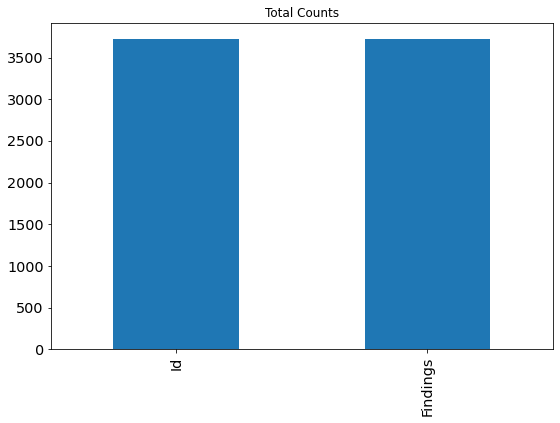

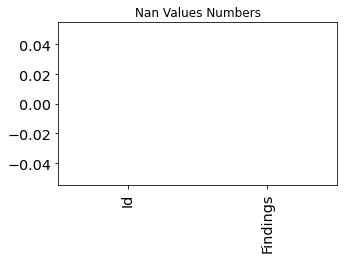

In [8]:
showCounts(metadata_frontal_df)
showNanValues(metadata_frontal_df)

In [9]:
def showUnique(data,bar_title):
   
    total = data.count()
    uniqAll = data.nunique() # unique count #==> len(data.value_counts())
    uniqAndOnlyOnce = np.sum(data.value_counts() == 1)
    uniqAndManyTimes = np.sum(data.value_counts() > 1)
    y = ['Total Count','All Unique Values','Only Once used in Unique Values','Many times used in Unique Values']
    X = [total,uniqAll,uniqAndOnlyOnce,uniqAndManyTimes]
    plt.figure(figsize=(9,6))
    plt.title(bar_title)
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    sns.barplot(X,y)
    
    for i in range(len(X)):
        print(f"{y[i]}:{X[i]}")

def showMostValues(data,bar_title):
    X = data.value_counts()[:10].values
    y = data.value_counts()[:10].keys()
    plt.figure(figsize=(9,6))
    plt.title(bar_title)
    sns.barplot(X,y)
    
    for i in range(len(X)):
        print(f"{y[i]}: {X[i]}")

Total Count:3727
All Unique Values:2379
Only Once used in Unique Values:2162
Many times used in Unique Values:217
No Findings: 497
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.: 50
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.: 49
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.: 45
The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality.: 45
Cardiac and mediastinal contours are within normal limits. The lungs are clear. Bony structures are intact.: 36
Both lungs are clear and expanded. Heart and mediastinum normal.: 33
The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lung

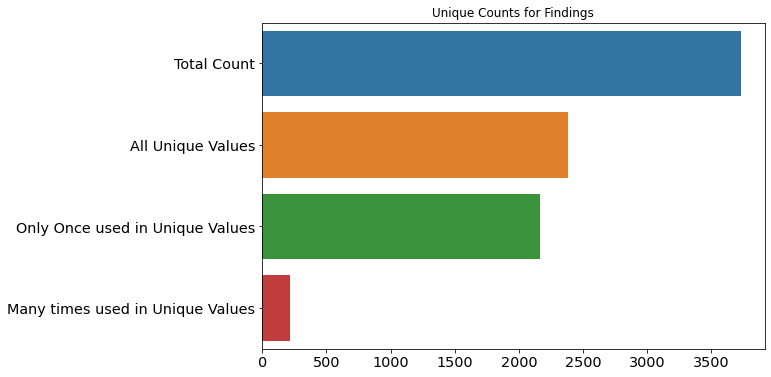

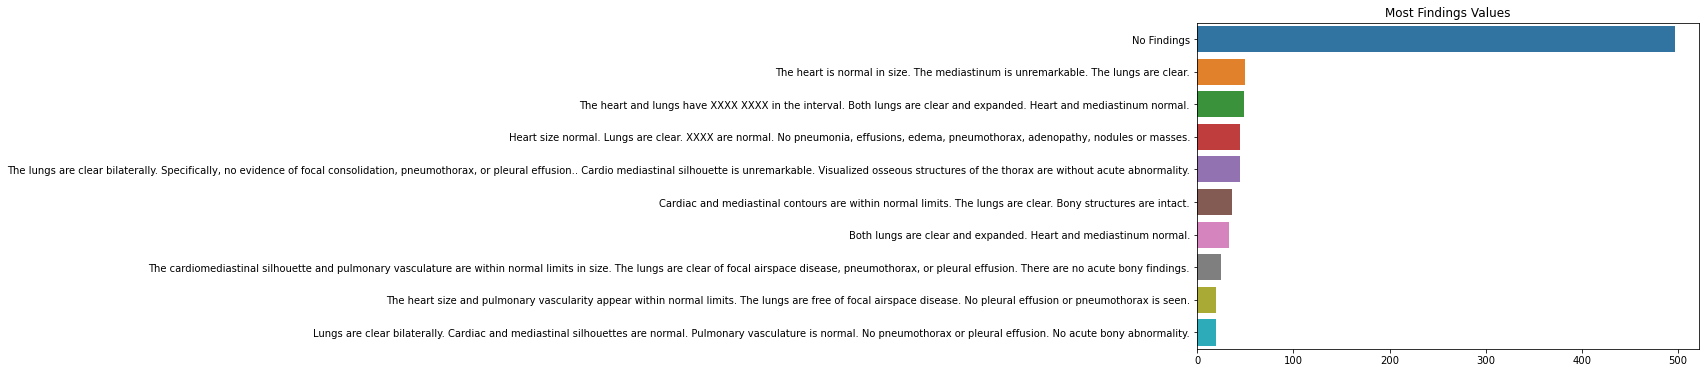

In [10]:
showUnique(metadata_frontal_df['Findings'],'Unique Counts for Findings')
showMostValues(metadata_frontal_df.Findings,'Most Findings Values')

In [12]:
data_df = metadata_frontal_df.copy()

In [11]:
'''
no_findings_index=[]
for index in range(len(metadata_frontal_df)):
    if metadata_frontal_df['Findings'].iloc[index] == 'No Findings':
        no_findings_index.append(index)

data_df.drop(index=no_findings_index,axis=0,inplace=True)
'''

"\nno_findings_index=[]\nfor index in range(len(metadata_frontal_df)):\n    if metadata_frontal_df['Findings'].iloc[index] == 'No Findings':\n        no_findings_index.append(index)\n\ndata_df.drop(index=no_findings_index,axis=0,inplace=True)\n"

No Findings: 497
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.: 50
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.: 49
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.: 45
The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality.: 45
Cardiac and mediastinal contours are within normal limits. The lungs are clear. Bony structures are intact.: 36
Both lungs are clear and expanded. Heart and mediastinum normal.: 33
The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings.: 25
Th

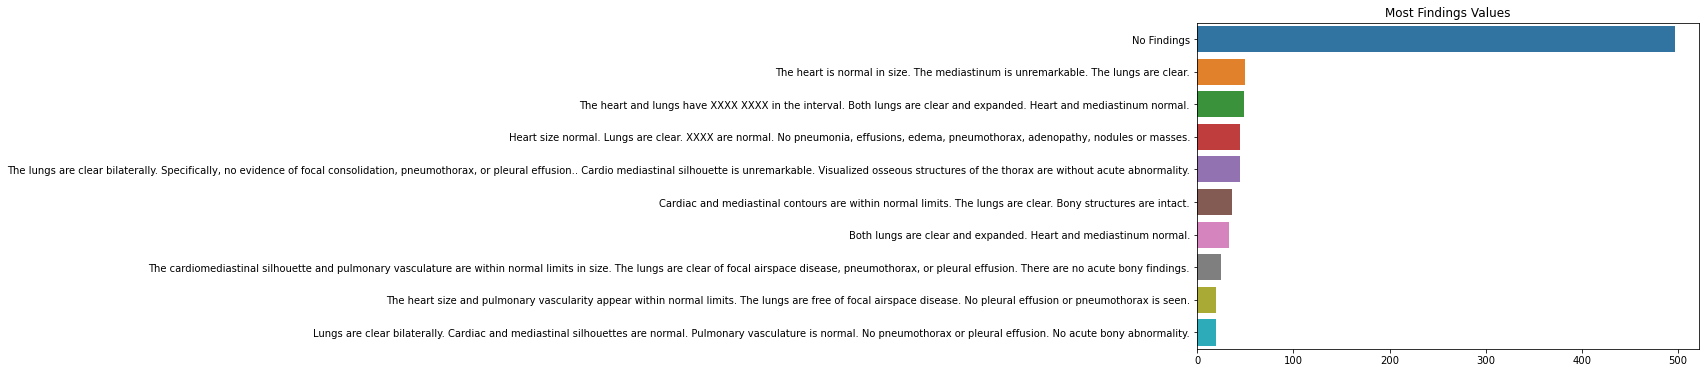

In [13]:
showMostValues(data_df.Findings,'Most Findings Values')

In [14]:
def decontraction(doc):
    docs = re.sub(r"won't", "will not", doc)
    docs = re.sub(r"can\'t", "can not", docs)
    docs = re.sub(r"n\'t", " not", docs)
    docs = re.sub(r"\'re", " are", docs)
    docs = re.sub(r"\'s", " is", docs)
    docs = re.sub(r"\'d", " would", docs)
    docs = re.sub(r"\'ll", " will", docs)
    docs = re.sub(r"\'t", " not", docs)
    docs = re.sub(r"\'ve", " have", docs)
    docs = re.sub(r"\'m", " am",docs)
    docs = re.sub(r"n\'t", " not", docs)
    docs = re.sub(r"\'re", " are", docs)
    docs = re.sub(r"\'s", " is", docs)
    docs = re.sub(r"\'d", " would", docs)
    docs = re.sub(r"\'ll", " will", docs)
    docs = re.sub(r"\'t", " not", docs)
    docs = re.sub(r"\'ve", " have",docs)
    docs = re.sub(r"\'m", " am", docs)
    docs = re.sub(r"\*+", "abuse", docs)
    return docs

def remove_stopwords(data):
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')# removing the "not" from the stopwords
  all_stopwords.remove('no')
  text_tokens = word_tokenize(data) # tokenizing the sentence into word
  tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
  return " ".join(tokens_without_sw)

def text_preprocess(data):
  clean_text=[]
  for text in (data.values): 
    text=text.lower()# making the text in lower case
    text=re.sub(r"[|\'||\\||/|?|$|.|.|,||;|><!&)(:`\n\t@#=+%^*~-]","",text)# removing the special character in text
    text=re.sub(r"xxxx","",text)# Removing the irrelavent XXXX words
    text=re.sub(r'xxx',"",text)
    text=re.sub(r'xx',"",text)
    text=re.sub(r'[0-9]',"",text)# Removing the number in text
    text = re.sub(r"yearold", "", text)
    text= re.sub('\s+',' ',text)
    text=re.sub("'",'',text)# Removing apoustahe
    text=re.sub(r'\.\.+', '.',text)# Removing multiple full stop
    text=re.sub(r'  ',"",text)
    text=decontraction(text)
    text=remove_stopwords(text)
    clean_text.append(text)
  return clean_text

In [15]:
data_df.head()

,Id,Findings
0,1_1_IM-0001-4001.png,The cardiac silhouette and mediastinum size ar...
1,10_IM-0002-2001.png,The cardiomediastinal silhouette is within nor...
2,100_IM-0002-1001.png,Both lungs are clear and expanded. Heart and m...
3,1000_IM-0003-1001.png,There is XXXX increased opacity within the rig...
4,1000_IM-0003-3001.png,There is XXXX increased opacity within the rig...


In [16]:
data_df['Findings'] = text_preprocess(data_df['Findings'])

In [17]:
data_df.head()

,Id,Findings
0,1_1_IM-0001-4001.png,cardiac silhouette mediastinum size within nor...
1,10_IM-0002-2001.png,cardiomediastinal silhouette within normal lim...
2,100_IM-0002-1001.png,lungs clear expanded heart mediastinum normal
3,1000_IM-0003-1001.png,increased opacity within right upper lobe poss...
4,1000_IM-0003-3001.png,increased opacity within right upper lobe poss...


In [18]:
class wordOperations:
    
    def sentencePerData(self,data):
        # Tüm Cümleleri mevcut veri için oluşturan fonk.
        sentencePerData = []
        for cumle in data.values:
            kelimeler_listesi = cumle.split()
            sentencePerData.append(kelimeler_listesi)
        return sentencePerData

    def createVocab(self,sentencePerData):
        # Verilen veri türünün cümle listesine göre sözlüğü oluşturan fonk.
        vocab = set()
        for cumle in sentencePerData:
            for kelime in cumle:
                vocab.add(kelime)
        return vocab

    def allWords(self,sentencePerData):
        # Verilen veri türünün cümle listesine göre tüm kelimelerin litesini oluşturan fonk.
        allWords = []
        for cumle in sentencePerData:
            for kelime in cumle:
                allWords.append(kelime)
        return allWords

    def countsOfAllWordsForData(self,vocab,allwords):
        # Verilen veri türüne göre tüm kelimelerinin kaçar adet kullanıldığı.
        wordRepeatCounts = {}
        for word in vocab:
            sayac = allwords.count(word)
            wordRepeatCounts[word] = sayac
        wordRepeatCountsSorted = sorted(wordRepeatCounts.items(), key=lambda items:items[1],reverse=True)
        # Bu fonksiyon Liste Döndürür ! Sıralama yaparken listeye dönüştürüyor.
        return wordRepeatCountsSorted

    def countsOfWordForData(self,sentencePerData):
        # Verilen veri türüne göre, her cümlenin kaç kelimeden oluştuğu listesini oluşturan ve en fazla kelime sayısını hesaplayan fonk.
        sayi = []
        maxUzunluk = 0
        for cumle in sentencePerData:
            kelime_sayisi = len(cumle)
            sayi.append(kelime_sayisi)
            if maxUzunluk < kelime_sayisi:
                maxUzunluk = kelime_sayisi
        return sayi,maxUzunluk


In [19]:
def applyWordOperations(data):
    wo = wordOperations()
    
    spd = wo.sentencePerData(data) # sentence per data : spd
    vocab = wo.createVocab(spd)
    allwords = wo.allWords(spd)
    count_allwords = wo.countsOfAllWordsForData(vocab,allwords)
    counts_perSentence,maxWordCount = wo.countsOfWordForData(spd)
    
    return spd,vocab,allwords,count_allwords,counts_perSentence,maxWordCount
    

In [20]:
tumCumleler_f,sozluk_f,tumKelimeler_f,tumKelimelerinFrekansi_f,kelimeSayisiFrekansi_f,enUzunCumle_f = applyWordOperations(data_df.Findings)

In [21]:
def genelBilgiVer(sozluk,tumKelimeler,enUzunCumle,kelimeSayisiFrekansi):
    average = '{0:.2f}'.format(np.mean(kelimeSayisiFrekansi))
    minimum = np.min(kelimeSayisiFrekansi)
    maximum = np.max(kelimeSayisiFrekansi)
    X = {'Sözlükdeki Kelime Sayisi(Benzersiz Kelimelerin Sayısı)':len(sozluk),
         'Tüm Kelimelerin Sayisi':len(tumKelimeler),'En Uzun Cümlenin Uzunluğu':enUzunCumle,'Bir cümledeki Ortalama Kelime sayisi:':average,'Minimum Kelime Sayisi:':minimum,'Maximum Kelime Sayisi:':maximum}
    for k,v in X.items():
        print(k,":",v)
    
def showMostWords(kelime_ve_frekanslar):
    kelimeler = []
    sayisi = []
    for k,f in kelime_ve_frekanslar[:200]:
        kelimeler.append(k)
        sayisi.append(f)
    plt.figure(figsize=(50,10))
    plt.title("Kelimeler ve Frekansları")
    plt.xticks(rotation=90,fontsize='x-large')
    sns.barplot(kelimeler,sayisi)
    
def showCumlelereGoreKelimeFrekansi(freqs):
    cumleYazisi = []
    for i in range(len(freqs)):
        yazi = f'{i+1}'
        cumleYazisi.append(yazi)
    plt.figure(figsize=(50,10))
    plt.title("Cumlelere Gore Kelime Frekanslari")
    plt.xticks(rotation=90)
    sns.scatterplot(cumleYazisi,freqs)


In [22]:
genelBilgiVer(sozluk_f,tumKelimeler_f,enUzunCumle_f,kelimeSayisiFrekansi_f)

Sözlükdeki Kelime Sayisi(Benzersiz Kelimelerin Sayısı) : 1510
Tüm Kelimelerin Sayisi : 71014
En Uzun Cümlenin Uzunluğu : 103
Bir cümledeki Ortalama Kelime sayisi: : 19.05
Minimum Kelime Sayisi: : 2
Maximum Kelime Sayisi: : 103


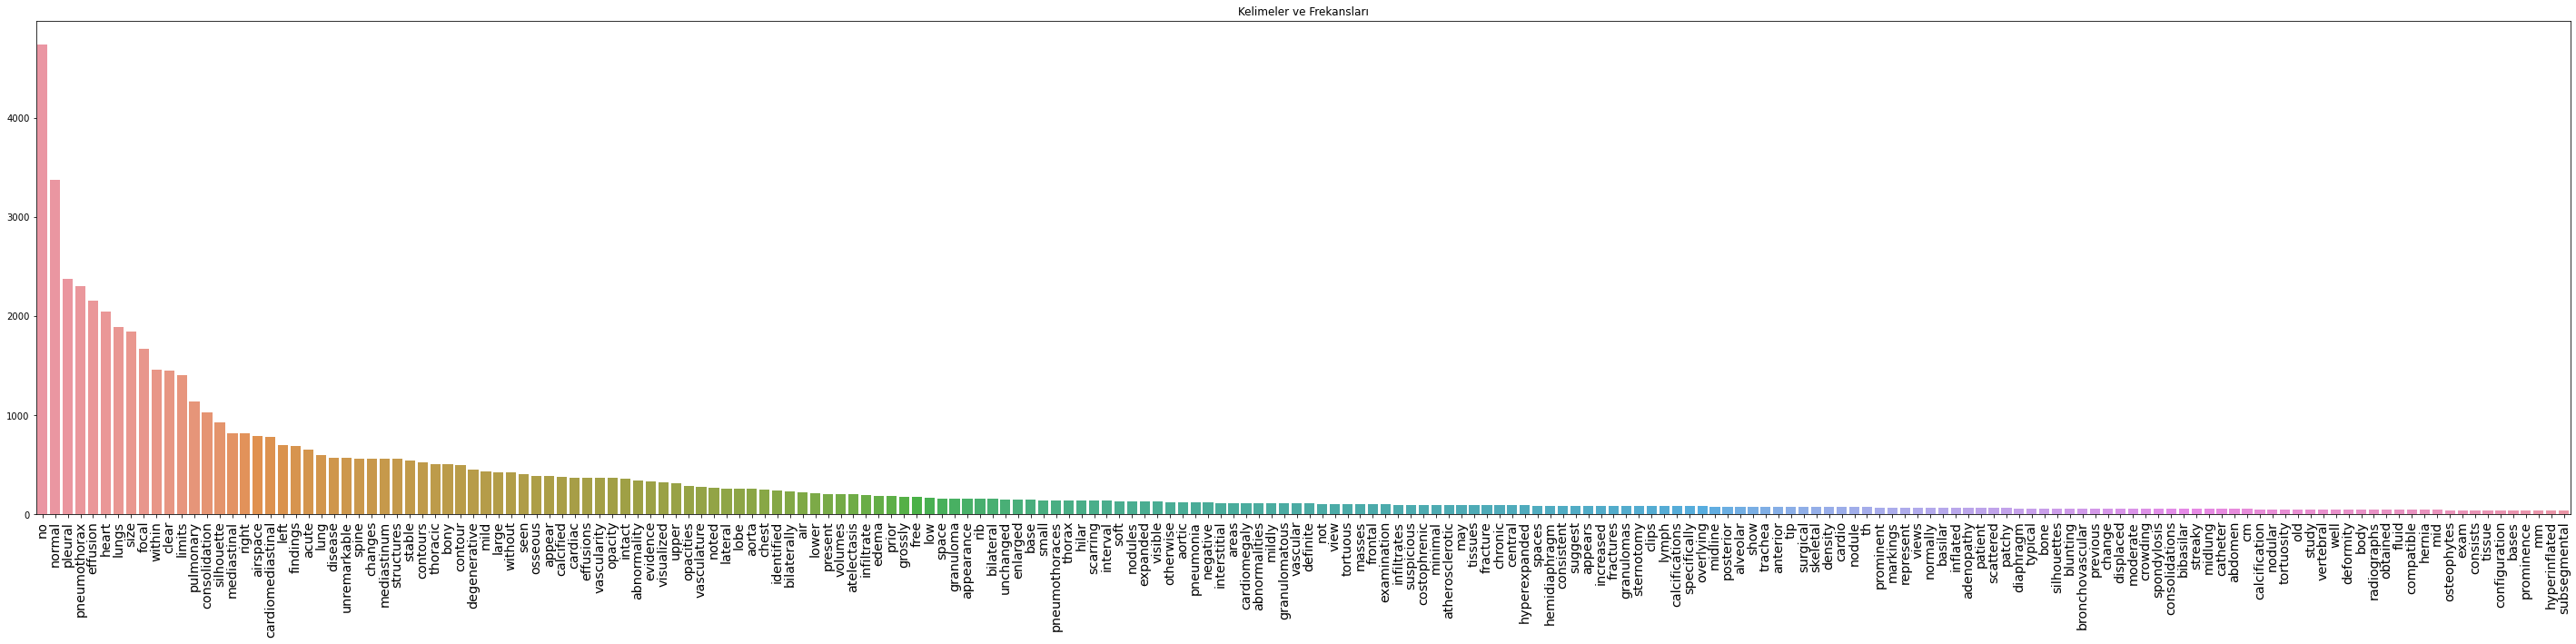

In [23]:
showMostWords(tumKelimelerinFrekansi_f)

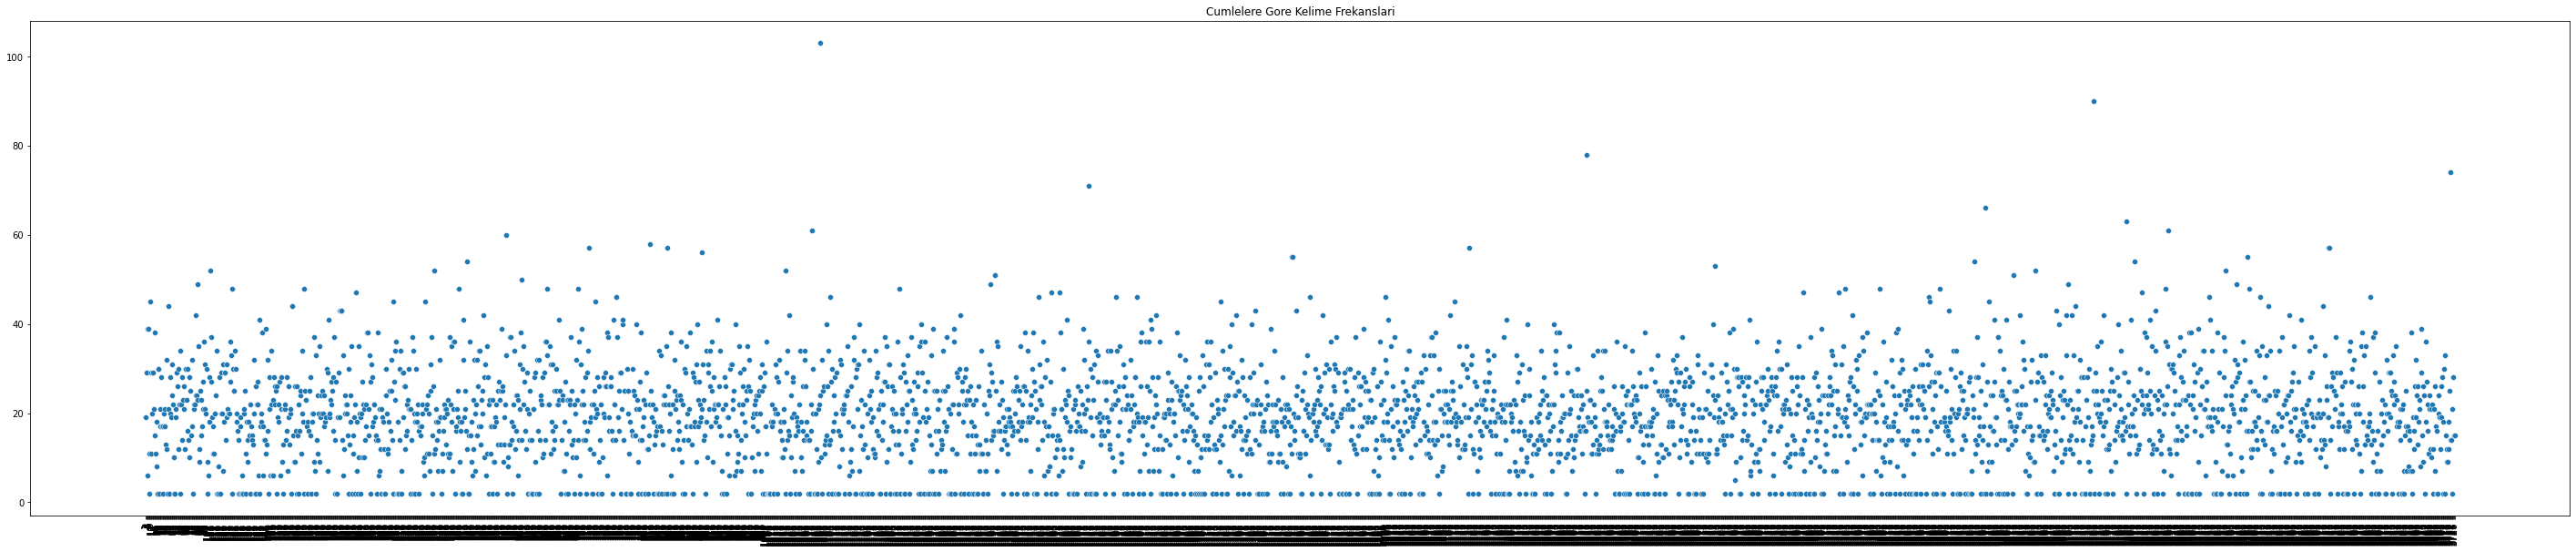

In [24]:
showCumlelereGoreKelimeFrekansi(kelimeSayisiFrekansi_f)

In [41]:
def findIndexWillDropped(data):
    bigger_40 = []
    smaller_3 = []
    for index in range(len(data)):
        sayi = data[index]
        if sayi >42:
            bigger_40.append(index)
        elif sayi<3:
            smaller_3.append(index)
        else:
            continue
    return bigger_40,smaller_3

bigger_40_f,smaller_3_f = findIndexWillDropped(kelimeSayisiFrekansi_f)

In [42]:
print("40'dan fazla kelime içeren rapor sayısı:",len(bigger_40_f))
print("3'den az kelime içeren rapor sayısı:",len(smaller_3_f))

40'dan fazla kelime içeren rapor sayısı: 89
3'den az kelime içeren rapor sayısı: 497


In [43]:
droppedIndexes = np.union1d(bigger_40_f,smaller_3_f)

In [44]:
data_df.drop(index=droppedIndexes,axis=0,inplace=True)

In [45]:
data_df.reset_index(drop=True,inplace=True) # drop tekrarlı veriyi engeller.

In [47]:
display(data_df.tail())

,Id,Findings
3136,995_IM-2478-1001.png,sternotomy sutures bypass grafts placed interv...
3137,997_IM-2479-1001.png,calcified mediastinal no focal areas consolida...
3138,998_IM-2479-1001.png,cardiomediastinal silhouette demonstrates norm...
3139,999_IM-2480-1001.png,lungs clear bilaterally no focal consolidation...
3140,999_IM-2480-3001.png,lungs clear bilaterally no focal consolidation...


In [49]:
kayit_ismi = './dataset/frontal_reports/'+'clean_indiana_ds.csv'
data_df.to_csv(kayit_ismi,index=False)

In [50]:
oku = pd.read_csv(kayit_ismi)
oku.tail()

,Id,Findings
3136,995_IM-2478-1001.png,sternotomy sutures bypass grafts placed interv...
3137,997_IM-2479-1001.png,calcified mediastinal no focal areas consolida...
3138,998_IM-2479-1001.png,cardiomediastinal silhouette demonstrates norm...
3139,999_IM-2480-1001.png,lungs clear bilaterally no focal consolidation...
3140,999_IM-2480-3001.png,lungs clear bilaterally no focal consolidation...


In [51]:
tumCumleler_f,sozluk_f,tumKelimeler_f,tumKelimelerinFrekansi_f,kelimeSayisiFrekansi_f,enUzunCumle_f = applyWordOperations(data_df.Findings)

Total Count:3141
All Unique Values:2264
Only Once used in Unique Values:2050
Many times used in Unique Values:214
heart normal size mediastinum unremarkable lungs clear: 50
heart lungs interval lungs clear expanded heart mediastinum normal: 49
heart size normal lungs clear normal no pneumonia effusions edema pneumothorax adenopathy nodules masses: 46
lungs clear bilaterally specifically no evidence focal consolidation pneumothorax pleural effusion cardio mediastinal silhouette unremarkable visualized osseous structures thorax without acute abnormality: 45
cardiac mediastinal contours within normal limits lungs clear bony structures intact: 36
lungs clear expanded heart mediastinum normal: 33
heart size pulmonary vascularity appear within normal limits lungs free focal airspace disease no pleural effusion pneumothorax seen: 27
cardiomediastinal silhouette pulmonary vasculature within normal limits size lungs clear focal airspace disease pneumothorax pleural effusion no acute bony findin

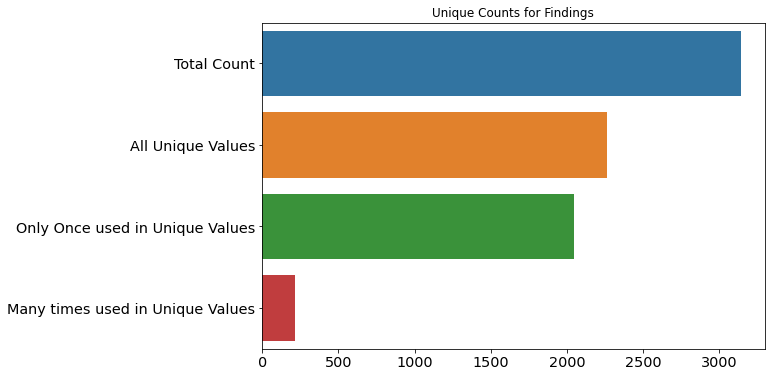

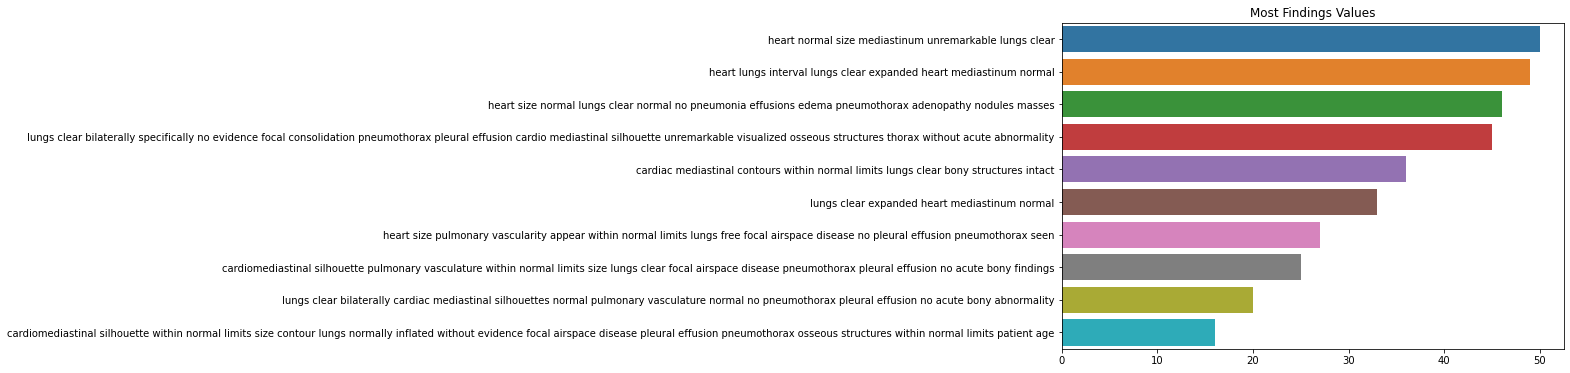

In [54]:
showUnique(data_df['Findings'],'Unique Counts for Findings')
showMostValues(data_df.Findings,'Most Findings Values')